### 텍스트 길이 분석(문자, 토큰)

C:\Users\user\AppData\Local\Temp\ipykernel_3348\4267219052.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot([df0["char_len"], df1["char_len"]],
C:\Users\user\AppData\Local\Temp\ipykernel_3348\4267219052.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot([df0["token_len"], df1["token_len"]],
C:\Users\user\AppData\Local\Temp\ipykernel_3348\4267219052.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(loc='upper right')


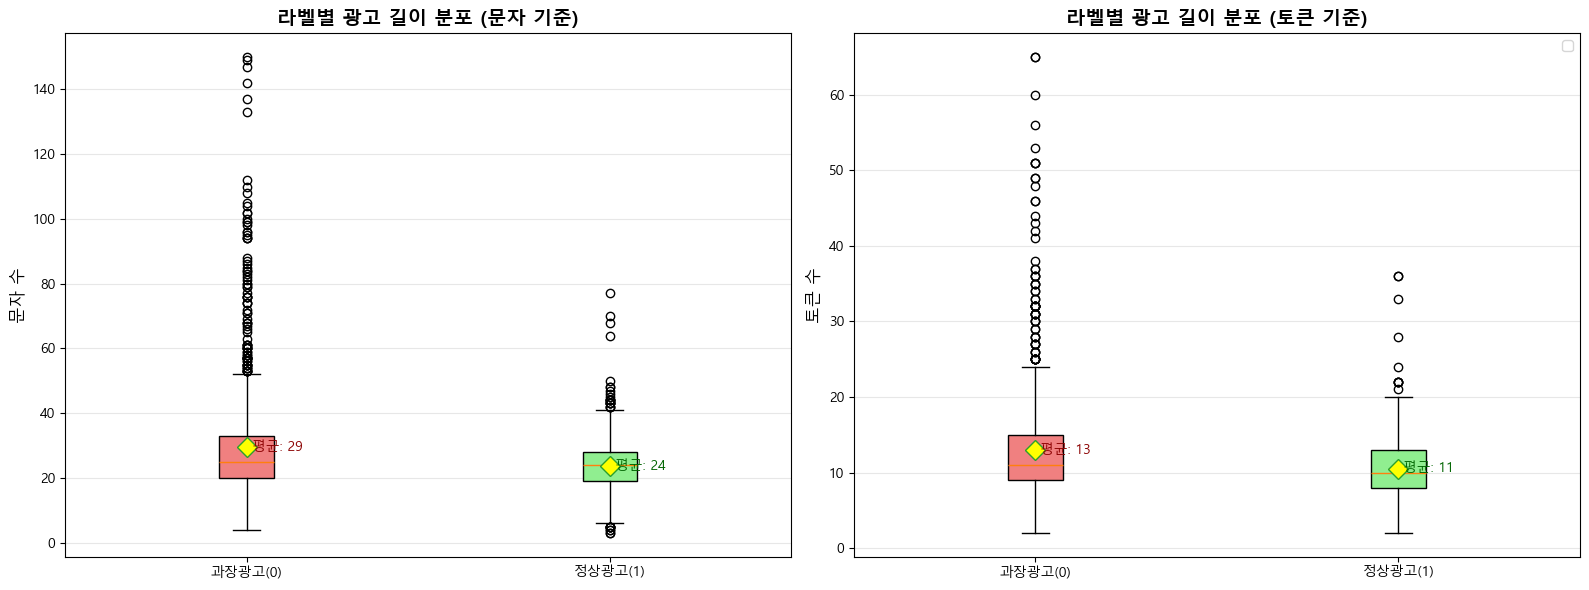


=== 문자 길이 통계 ===
과장광고: 평균 29, 중앙값 25, 범위 4~150
정상광고: 평균 24, 중앙값 24, 범위 3~77

=== 토큰 길이 통계 ===
과장광고: 평균 13, 중앙값 11, 범위 2~65
정상광고: 평균 11, 중앙값 10, 범위 2~36

=== 길이 차이 ===
문자 길이 비율: 과장/정상 = 1.25배
토큰 길이 비율: 과장/정상 = 1.23배


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoTokenizer

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 0. 데이터 불러오기
df = pd.read_excel("C:/Users/user/Desktop/과장광고 원시데이터 라벨링.xlsx")

# 1. 문자 길이 & 토큰 길이 계산(KoBERT, KoELECTRA, KcELECTRA 최대 토큰 길이 동일)
df["char_len"] = df["text"].astype(str).str.len()

model_name = "beomi/KcELECTRA-base-v2022" 
tokenizer = AutoTokenizer.from_pretrained(model_name)
df["token_len"] = df["text"].astype(str).apply(
    lambda x: len(tokenizer.tokenize(x))
)

# 2. 라벨별 분리
df0 = df[df['label'] == 0]  # 과장광고
df1 = df[df['label'] == 1]  # 정상광고

# 3. 박스플롯 2개 그리기 (문자 vs 토큰)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 3-1. 문자 길이 박스플롯
bp1 = axes[0].boxplot([df0["char_len"], df1["char_len"]], 
                       labels=['과장광고(0)', '정상광고(1)'],
                       patch_artist=True,
                       showmeans=True,
                       meanprops=dict(marker='D', markerfacecolor='yellow', markersize=10))
bp1['boxes'][0].set_facecolor('lightcoral')
bp1['boxes'][1].set_facecolor('lightgreen')

axes[0].set_ylabel("문자 수", fontsize=12)
axes[0].set_title("라벨별 광고 길이 분포 (문자 기준)", fontsize=14, fontweight='bold')
axes[0].grid(True, axis='y', alpha=0.3)

# 평균값 표시
mean0_char = df0["char_len"].mean()
mean1_char = df1["char_len"].mean()
axes[0].text(1, mean0_char, f' 평균: {mean0_char:.0f}', 
            verticalalignment='center', fontsize=10, color='darkred')
axes[0].text(2, mean1_char, f' 평균: {mean1_char:.0f}', 
            verticalalignment='center', fontsize=10, color='darkgreen')

# 3-2. 토큰 길이 박스플롯
bp2 = axes[1].boxplot([df0["token_len"], df1["token_len"]], 
                       labels=['과장광고(0)', '정상광고(1)'],
                       patch_artist=True,
                       showmeans=True,
                       meanprops=dict(marker='D', markerfacecolor='yellow', markersize=10))
bp2['boxes'][0].set_facecolor('lightcoral')
bp2['boxes'][1].set_facecolor('lightgreen')

axes[1].set_ylabel("토큰 수", fontsize=12)
axes[1].set_title("라벨별 광고 길이 분포 (토큰 기준)", fontsize=14, fontweight='bold')
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].legend(loc='upper right')

# 평균값 표시
mean0_token = df0["token_len"].mean()
mean1_token = df1["token_len"].mean()
axes[1].text(1, mean0_token, f' 평균: {mean0_token:.0f}', 
            verticalalignment='center', fontsize=10, color='darkred')
axes[1].text(2, mean1_token, f' 평균: {mean1_token:.0f}', 
            verticalalignment='center', fontsize=10, color='darkgreen')

plt.tight_layout()
plt.show()

# 4. 통계 정보 출력
print("\n=== 문자 길이 통계 ===")
print(f"과장광고: 평균 {df0['char_len'].mean():.0f}, 중앙값 {df0['char_len'].median():.0f}, 범위 {df0['char_len'].min():.0f}~{df0['char_len'].max():.0f}")
print(f"정상광고: 평균 {df1['char_len'].mean():.0f}, 중앙값 {df1['char_len'].median():.0f}, 범위 {df1['char_len'].min():.0f}~{df1['char_len'].max():.0f}")

print("\n=== 토큰 길이 통계 ===")
print(f"과장광고: 평균 {df0['token_len'].mean():.0f}, 중앙값 {df0['token_len'].median():.0f}, 범위 {df0['token_len'].min():.0f}~{df0['token_len'].max():.0f}")
print(f"정상광고: 평균 {df1['token_len'].mean():.0f}, 중앙값 {df1['token_len'].median():.0f}, 범위 {df1['token_len'].min():.0f}~{df1['token_len'].max():.0f}")

print("\n=== 길이 차이 ===")
print(f"문자 길이 비율: 과장/정상 = {df0['char_len'].mean()/df1['char_len'].mean():.2f}배")
print(f"토큰 길이 비율: 과장/정상 = {df0['token_len'].mean()/df1['token_len'].mean():.2f}배")